<a href="https://colab.research.google.com/github/sydneyvert/covid-datascience/blob/sally-develop/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries for exploratory analysis

In [ ]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from matplotlib import ticker 
import seaborn as sns
from datetime import datetime, timedelta,date

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%cd drive/My\ Drive/repos/covid_19_ML/covid-datascience

[Errno 2] No such file or directory: 'drive/My Drive/repos/covid_19_ML/covid-datascience'
/content/drive/My Drive/repos/covid_19_ML


In [ ]:
df_recovered = pd.read_csv('datasets_494724_1405545_time_series_covid_19_recovered.csv')
df_confirmed = pd.read_csv('datasets_494724_1405545_time_series_covid_19_confirmed.csv')
df_deaths = pd.read_csv('datasets_494724_1405545_time_series_covid_19_deaths.csv')

In [ ]:
df_list = [df_recovered, df_confirmed, df_deaths]

In [ ]:
df_recovered.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254,21454,22456,22824,23151,23273,23634,23741,23741,23924,24550,24602,24793,25180,25198,25358,25389,25471,25509,25509,25510,25669,25669,25742,25840,25903
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014,2062,2091,2137,2214,2264,2311,2352,2397,2463,2523,2608,2637,2682,2745,2789,2830,2883,2952,2961,3018,3031,3031,3123,3155,3227
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9674,9897,10040,10342,10832,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019,14295,14792,15107,15430,15744,16051,16400,16646,16983,17369,17369,18076,18088,18837,19233,19592,20082,20537,20988,21419,21901,22375,22802,23238,23667
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,799,799,799,800,800,800,800,800,800,802,802,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,804,806,807,807,807,821,825,825,828,839
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,93,93,97,97,107,108,108,108,117,117,117,117,118,118,118,118,124,124,199,210,221,221,221,221,236,241,242,242,242,266,301,395,437,460,461,476,503,506,520,544


In [ ]:
df_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 203 entries, Province/State to 8/7/20
dtypes: float64(2), int64(199), object(2)
memory usage: 401.4+ KB


In [ ]:
df_recovered.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/29/20', '7/30/20', '7/31/20', '8/1/20', '8/2/20', '8/3/20', '8/4/20',
       '8/5/20', '8/6/20', '8/7/20'],
      dtype='object', length=203)

Find total cases per province/state - country/region:

In [ ]:
def add_sum_column(df):
  # Drop lat and long
  df_copy = df.drop(['Lat', 'Long'], axis=1)
  # Sum together columns
  df['Sum']=df_copy.sum(axis = 1, numeric_only = True)
  return df

In [ ]:
for df in df_list:
  df = add_sum_column(df)

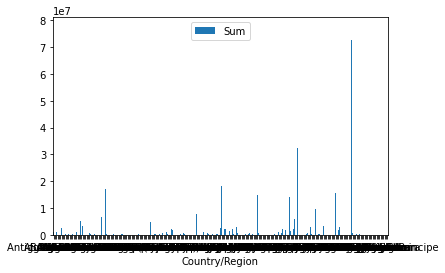

In [ ]:
ax = df_recovered.plot.bar(x='Country/Region', y='Sum', rot=0)

There are so many countries !!
Options:
* Pick a question relating to all countries: train on all and only visualise top 25
* Pick a question which groups countries (eg by continent?)
* Pick a question on a subset of the countries

In [ ]:
df_recovered.sort_values(by=['Sum'], ascending=False, inplace=True, ignore_index=True )

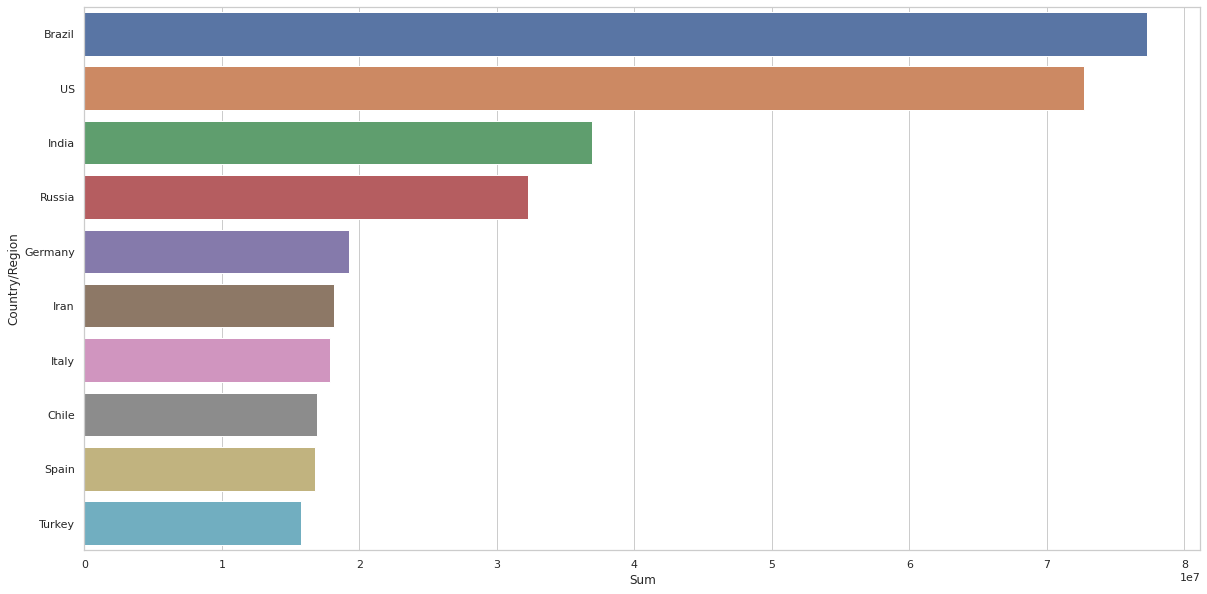

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,10))
ax = sns.barplot(y=df_recovered['Country/Region'].iloc[0:10], x=df_recovered['Sum'])

Combine dataframes to look at total recovered, confirmed and dead

In [ ]:
df_recovered = df_recovered.rename(columns={'Sum': 'Total Recovered'})
df_confirmed = df_confirmed.rename(columns={'Sum': 'Total Confirmed'})
df_deaths = df_deaths.rename(columns={'Sum': 'Total Dead'})

for df in df_list:
  df.set_index(['Country/Region', 'Province/State'])

In [ ]:
df_combi = pd.concat(
    [df_recovered[['Country/Region', 'Province/State', 'Total Recovered']],
      df_confirmed['Total Confirmed'],
      df_deaths['Total Dead']],
      axis = 1
)

,index,Country/Region,Province/State,Total Recovered,Total Confirmed,Total Dead
0,0,Brazil,NaN,77300605.0,2340135,63224
1,1,US,NaN,72723863.0,257618,7551
2,2,India,NaN,36919208.0,1525551,91499
3,3,Russia,NaN,32248460.0,104640,5995
4,4,Germany,NaN,19232467.0,36400,1695
...,...,...,...,...,...,...
261,261,NaN,NaN,NaN,56491,1114
262,262,NaN,NaN,NaN,86333,23180
263,263,NaN,NaN,NaN,20037,414
264,264,NaN,NaN,NaN,465460,4583


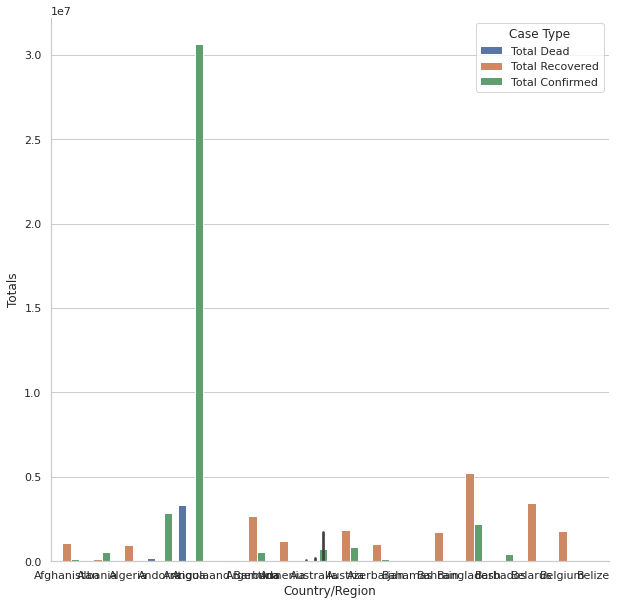

In [ ]:
sns.set(style='whitegrid')
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = df_combi.melt(id_vars=['Country/Region', 'Province/State'], 
                     value_vars = ['Total Recovered', 'Total Confirmed', 'Total Dead'],
                     var_name = 'Case Type',
                     value_name = 'Totals').rename(columns=str.title)
tidy_sorted = tidy.sort_values('Country/Region')
sns.barplot(x='Country/Region', y='Totals', hue='Case Type', data=tidy_sorted.iloc[0:75], ax=ax1)
sns.despine(fig)

To do: normalise (min/max scaler?) case types and replot to compare death / recovery / confirmed cases.
